In [19]:
# Run this cell before beginning the exercises.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import ipywidgets as widgets
from ipywidgets import interact

# Introduction

<p>Make a plot of <span>\(r_E\)</span> vs <span>$D_L$</span> for a fixed <span>$M_L$</span> and <span>$D_S$</span>.</p>


Hello Microlenser. I am your Guide. 

I'll keep this introduction brief, incase you are short on time. 

This notebook is going to take a liesurely stroll through the basic concepts of microlensing. This topic is complex and has a lot of naunce, so I propose we first cover some of the basics and background information, the stuff that doesn't make us want to bang our heads against the wall, and get to know each other a little. But if that doesn't sound like somthing you want to do, I'm not offended; I'm a notebook. 

Below is a list of the concepts we will cover here. Feel free to skip to whatever point makes you feel good. Or skip this whole notebook by going straight to the Next Steps section.

## Contents
- [What is Microlensing?](#what-is-microlensing)
- [What is it used for?](#what-is-it-used-for)
  - [Exoplanets](#exoplanets)
  - [Brown Dwarf](#brown-dwarf)
  - [Black Holes and other Remnants](#black-holes-and-other-remnants)
  - [Stellar Population Models](#stellar-population-models)
  - [Dark Matter](#dark-matter)
- [Microlensing Eras](#microlensing-eras)
- [Next Steps](#next-steps)



Great. Now that they're gone, let's meander a bit. This notebook will make use of a variety of media to keep it accessable and interesting for all users, as seen in the following section. And if you need some motivation, or dopamine throughout, take a look at the [checklist tool](http://localhost:8866/ProgressChecklist.ipynb) where you can tick of sections for this notebook as you complete them.



Gravitational lensing is a strange and fascinating phenomenon in astrophysics and a uniquely powerful tool for unveiling the secrets of the universe.  At its core, this phenomenon is rooted in Einstein's theory of general relativity. It occurs when the gravity of massive objects, such as galaxies, stars, planets, or dark matter, curves spacetime, distorting the path travelled by light as it passes by, as if the light were passing through a **lens**. This can make the objects producing this light (the **source**s) appear to be in locations they are not and as shapes they are not. If the visible source is approximately behind a simple lensing mass, as seen by an observer, the source will be observed as a magnified image, or images, of itself. These images will form about the [Einstein ring](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Einstein_ring&ved=2ahUKEwiFh_et4OOIAxU578kDHTPhAYwQFnoECBYQAQ&usg=AOvVaw2L-WOWW_yeDFzWYp_JfVWT) and will often appear stretched and curved. The radius of this ring, $\tilde{r}_E$, is dependent on the mass of the lens; a greater mass results in a larger Einstein ring.


The angular Einstein radius is defined by,

$$
    \begin{matrix}
        \theta_{\rm E} & =\left( \frac{4GM_{\rm L}}{c^2} \frac{D_{\rm LS}}{D_{\rm L} D_{\rm S}} \right){\frac{1}{2}}\\
        & =\sqrt{M_{\rm L}\kappa\pi_{rel}},
    \end{matrix}
$$

where $M_{\rm L}$ is the total mass of the lens system, $D_{\rm LS}$ is the distance from the lens plane to the source plane, $D_{\rm L}$ is the distance from the observer to the lens plane, $D_{\rm S}$ is the distance from the observer to the source plane, and $\kappa=4G/(c^2\rm{au})\sim8.14 \, \rm{mas}/M_\odot$. 

We refer you to [Microlensing Source](https://www.microlensing-source.org/tutorial/pspl/) for a detailed explanation of how this Einstein ring equation in derived. 

Below we define a python function for this angular Einstein ring size. The units for this can be a little bit trickey to get right, so take care when defining you own functions.

In [2]:
def theta_E(M: float, Dl: float, Ds: float) -> float:  # this is a function definition with a type hint
    """
    Calculate the Einstein radius of a lensing system.

    ----------
    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    
    ----------
    Returns
    ----------
    float
        Einstein radius in arcseconds
    
    ----------
    Notes
    ----------
    The Einstein radius is calculated as:
    ``` math::
    theta_E = sqrt(4 * G * M / c^2 * (1.0 / Dl - 1.0 / Ds)
    ```
    where
    - G is the gravitational constant
    - M is the mass of the lens
    - c is the speed of light
    - Ds is the distance to the source
    - Dl is the distance to the lens.
    """
    
    # Constants
    kappa = 8.144  # mas/M_Sun
    #kappa_mu = kappa*1000  # muas/M_Sun
    #as2muas = 1.0*1000000.0  # 1 as in muas
    as2mas = 1.0*1000.0  # 1 as in mas

    # Calculate Einstein radius
    pirel_as = (1./(Dl*1000)-1.0/(Ds*1000))
    pirel_mas = pirel_as*as2mas
    #pirel_muas = pirel_as*as2muas
    #print(pirel_as, pirel_muas)
    return np.sqrt(kappa * M * pirel_mas)

This ring is a mathematical construct, but the figures below shows some pretty examples of the Einstein ring being observed as it traced out by source images during gravitational lensing events.

Add HST images

Here is a cozy little youtube video to get us in to the mood for learning about microlensing  (and also check the i'm running correctly).

<p align="center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/VeAVmp9MLH4?si=MjOr5LkFwukX_I1w" title="YouTube video player" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen> </iframe>
</p>

The above video may not work for you if you are using an [IDE](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Integrated_development_environment&ved=2ahUKEwjT2_uJ4OOIAxU1MNAFHU52DUAQFnoECBgQAQ&usg=AOvVaw26G_hSQrwphgc0qRbOs_Ur). Try clicking this [link](https://www.youtube.com/watch?v=VeAVmp9MLH4) to open it in a browser.

If you are still having issues, consider openning this notebook in a browser by running

```bash
(TheGuide) Notebooks$ jupyter notebook
```

from the Notebooks directory.

<a id="what-is-microlensing"></a>
## 1. What is Microlensing?



Microlensing is a specific example of gravitational lensing, where the apparent separation of the lensed images is small enough (i.e., microarcseconds) that they cannot be resolved into individual images with current technology. 

In photometric observations, this means that the entire ["strong" lensing effect](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://simple.wikipedia.org/wiki/Gravitational_lensing%23Strong_lensing&ved=2ahUKEwjsyb_F3-OIAxXxHNAFHaaTLZMQ0gIoAXoECBcQAg&usg=AOvVaw0tyN7JqdXk--HO8mbR53fG) is contained within what appears to be a single star or [point-spread function (PSF)](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Point_spread_function&ved=2ahUKEwjlstDo3-OIAxVLLtAFHVG-FWYQFnoECAkQAQ&usg=AOvVaw2xNwJtwWWTn-egxItIx4sM). The lensing can instead be observed because of the changing magnification and number of source-star images creating variations in brightness. The brightness increase is transient in nature as the lens and source are moving relative to each other. This effect is called photometric microlensing. 

<p align=center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/z75aHv9SpVg?si=pkcW9WrT226AkEfh" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p>

> *In bouts of flagrant hubris, unbecoming of a notebook, I will often refer to photometric microlensing as simply microlensing. Astrometric microlensing is a topic left out in the cold for the duration of this notebook. But should you wish to visit it and ensure it feels loved, you can do so [here](AstrometricMicrolensing.ipynb).*

If we could see the magnified images in a microlensing event forming, they would scoot around paths that trace out the Einstein ring. The event would look something like [this](https://www.youtube.com/embed/2oIvUd0hdKY?si=0IDzw_rL1Q3Ml2KL):

<p align=center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/2oIvUd0hdKY?si=0IDzw_rL1Q3Ml2KL" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p>

Theoretical peak magnification $A_{\rm peak}$, for a simple microlensing event, occurs when the lens and source are most closely aligned, with an angular separation of $u_0$, at time $t_0$. The intensity of an event's $A_{\rm peak}$ depends on how closely the source aligns with the lens (i.e., how small $u_0$ is) and the angular size ($\rho$) of the source, proportional to the angular size of the Einstein ring, $\theta_{\rm E}$. The time taken to shift lens-source relative positions by $\theta_{\rm E}$ is $t_{\rm E}$, which is a proxy for lens-source relative proper motion. 

This angular-separation dependence of the magnification is demonstrated in this figure. 

| ![SL](./Assets/single_trajectories_FS.png) |
| :-: |
| *Left:* Example trajectory diagram in the lens plane, showing set of source trajectories (purple) with varying $u_0$. The lens object position is plotted as a red, filled circle. The scale of the caustic diagram is in units of $\theta_{\rm E}$, and the Einstein ring, about which source images form, is indicated by the dashed grey circle. The angular source size ($\rho=0.05$) and relative trajectory direction are indicated by the circle and arrow on the trajectory lines, respectively. *Right:* Corresponding magnification curves, given the trajectories shown on the diagram (*left*), where $\tau$ is the time, relative to $t_0$, scaled by $t_{\rm E}$. |

A larger $u_0$ means a lower $A_{\rm peak}$ and larger $\rho$ means the magnification curve is more smoothed. This smoothing is termed the ``finite-source effect.'' Theoretically, for a point source ($\rho=0$), $A_{\rm peak}=\infty$ if $u_0=0$. The basic shape of the lightcurves of these point-source-like events is referred to as a Paczynski curve.

If none of that sunk in, don't worry. You'll start to get a feel for it as we move through some examples. We will also learn how to make a figure like the one shown above in the Notebook [SingleLens.ipynb](SingleLens.ipynb).

The slider below alows you to change the physical parameters of a lensing "event" to see how these changes affect the size of the einstein ring.

> For quick conversions, it is worth noting that Sun is about 1000 times the mass of Jupiter. So the mass of Jupiter is like one milli-solar masses. 
> The duterium fusion limit is at about 10 Jupiter masses or 0.01 solar masses. 
> The hydrogen fusion limit is around 100 Jupiter masses or 0.1 solar masses.

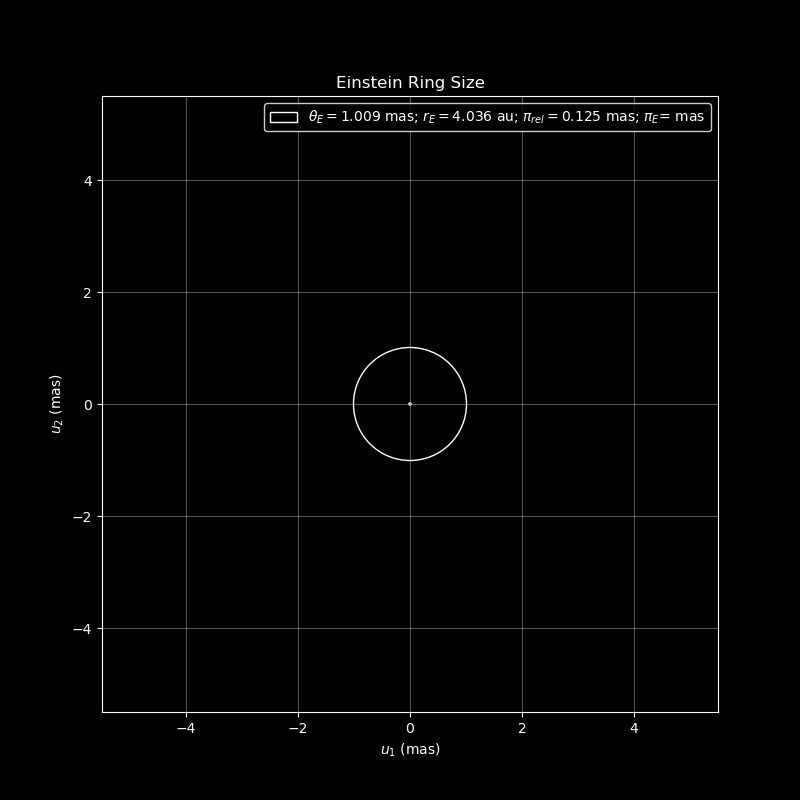

In [12]:
# Interactive Angular Eistein Ring Radius Plot

# If the plot does not present correctly in the notebook, try rerunning the cell.

theta_E_max = 5.5  # Maximum value for theta_E

%matplotlib widget

# Create the figure and axis globally so they are not recreated each time
plt.close(1)  # Close the previous figure if it exists
fig, ax = plt.subplots(num=1, figsize=(8, 8))

# Set plot background and text colors
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Update the plot without making a new figure
fig.canvas.draw()

def update_plot(M: float, Dl: float, Ds: float) -> None:
    """
    Update the plot with the given lensing system parameters.

    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    """

    global theta_E_max  # Use the global variable for the maximum theta_E value
    theta_E_value = theta_E(M, Dl, Ds)  # mas
    r_E_au = theta_E_value * Dl  # au
    pi_rel = 1.0/(Dl)-1.0/(Ds)  # mas  # CHECK THIS!

    # Update the maximum value if needed
    if theta_E_value > theta_E_max:
        theta_E_max = theta_E_value*1.1  # Increase the maximum value if needed

    # Clear the previous plot content but keep the figure and axis
    ax.cla()  # Clear only the current axes

    fig.patch.set_facecolor('black')  # Set the figure background color to black

    # Plot the circles  # ADD PIE!
    circle = Circle((0, 0), theta_E(M, Dl, Ds), edgecolor='white', facecolor='none', alpha=1.0, 
                    label=r'$\theta_E=$%3.3f mas; $r_E=$%3.3f au; $\pi_{rel}=$%3.3f mas; $\pi_E$= mas' %(theta_E_value, r_E_au, pi_rel))
    ax.add_patch(circle) 

    # hydrogen fusing mass-radius relation (0.1 < M < 1)
    R = M**0.8 / 0.57
    R_sun2au = 0.00465  # 1 R_sun = 0.00465 au
    rho_L = R * R_sun2au / Dl # kpc, au, -> mas

    # Plot an EXAGGERATED star to represent the lens
    bigger = 10
    star = Circle((0, 0), bigger * rho_L, edgecolor='yellow', facecolor='white') 
    ax.add_patch(star)
    np.save('multiplication_factor.npy', bigger)

    # Set text colot to white
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.title.set_color('white')

    # Set labels and title
    ax.set_xlabel(r'$u_1$ (mas)')
    ax.set_ylabel(r'$u_2$ (mas)')
    ax.set_title('Einstein Ring Size')

    # Add a white grid
    ax.grid(True, color='darkgrey', alpha=0.5)

    # Set axis to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set the limits to a fixed range for simplicity
    ax.set_xlim(-theta_E_max, theta_E_max)
    ax.set_ylim(-theta_E_max, theta_E_max)

    # Add a legend
    ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Update the plot without making a new figure
    fig.canvas.draw()

# Function to update the Ds slider's minimum value based on Dl
def update_Ds_slider(*args):
    Ds_slider.min = Dl_slider.value + 0.1  # Ensure Ds > Dl, but too close will do silly stuff
    if Ds_slider.value <= Ds_slider.min:
        Ds_slider.value = Ds_slider.min

# Function to handle updates when sliders change
def update_sliders(change):
    # Pass the current values of M, Dl, and Ds to the plot update function
    update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

# Create interactive sliders and text boxes for M, Dl, and Ds
M_slider = widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='Mass (M_sun)')
M_text = widgets.FloatText(value=1.0)

Dl_slider = widgets.FloatSlider(value=4.0, min=1.0, max=10.0, step=0.1, description='Lens Distance (kpc)')
Dl_text = widgets.FloatText(value=4.0)

Ds_slider = widgets.FloatSlider(value=8.0, min=5.1, max=10.0, step=0.1, description='Source Distance (kpc)')
Ds_text = widgets.FloatText(value=8.0)

# Link sliders and text boxes
widgets.jslink((M_slider, 'value'), (M_text, 'value'))
widgets.jslink((Dl_slider, 'value'), (Dl_text, 'value'))
widgets.jslink((Ds_slider, 'value'), (Ds_text, 'value'))

# Update the Ds slider's minimum value when Dl changes
Dl_slider.observe(update_Ds_slider, 'value')

# Observe slider value changes to trigger plot updates
M_slider.observe(update_sliders, 'value')
Dl_slider.observe(update_sliders, 'value')
Ds_slider.observe(update_sliders, 'value')

# Display sliders and text boxes
display(widgets.HBox([M_slider, M_text]))
display(widgets.HBox([Dl_slider, Dl_text]))
display(widgets.HBox([Ds_slider, Ds_text]))

# Initial plot
update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)


<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 20px;
    margin: 20px 5px;    
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 1</h2>
    <p>If you went through the code for this plot, you may have noticed that the size of the lens star is exaggerated in this plot. By what factor is the display star's angular radius too big?</p>
    <br>
</div>

In [142]:
answer = 0  # replace this value with your answer

if answer == np.load('multiplication_factor.npy'):
    print('Correct!')
else:
    print('Not quite. Try again.')

Not quite. Try again.


The plot below gives us an intuition for the scale of this angular Eintstein radius in both the lens and projected onto the source plane.

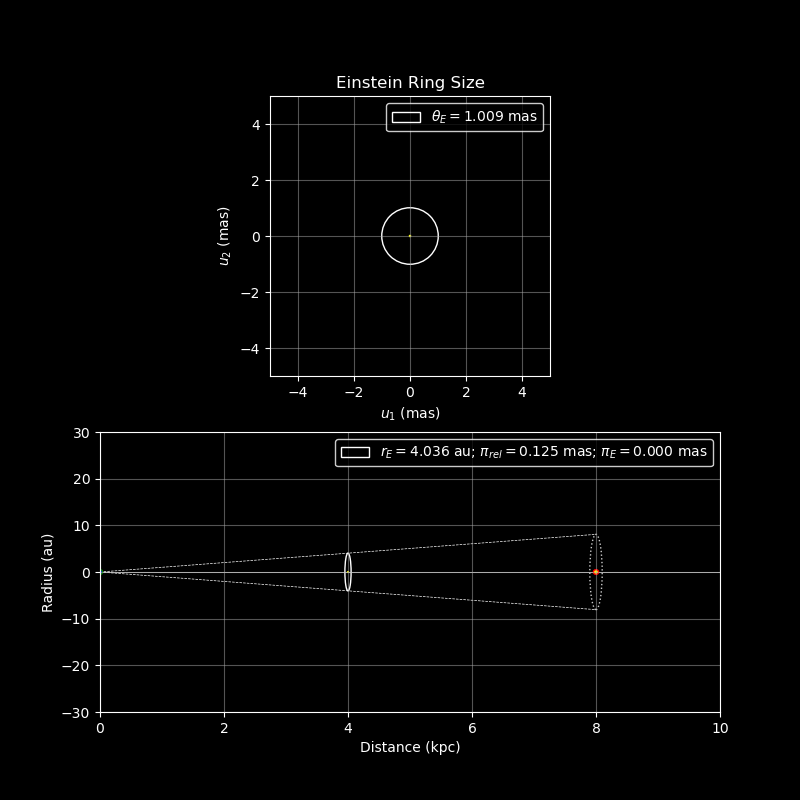

In [15]:
# interactive Einstein radius plot; angular, physical, and projected into the lens plane.

theta_E_max = 5.0  # Maximum value for theta_E

%matplotlib widget

# Create the figure and axis globally so they are not recreated each time
plt.close(2)  # Close the previous figure, if it exists
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), num=2)

fig.patch.set_facecolor('black')  # Set the figure background color to black

# Main plot: Einstein ring
#--------------------------

# Set plot background and text colors
ax1.set_facecolor('black')
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')

# Add a white grid
ax1.grid(True, color='darkgrey', alpha=0.5)

# Set axis to be equal
ax1.set_aspect('equal', adjustable='box')

# Secondary plot: Distance vs. Radius
#------------------------------------

# Set plot background and text colors
ax2.set_facecolor('black')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')

# Add a white grid
ax2.grid(True, color='darkgrey', alpha=0.5)

# Set axis limits
ax2.set_xlim(0, 10)
ax2.set_ylim(-30,  30)
ratio = 5/60  # Full height half width of plot axis 2

ax2.set_xlabel('test label')

# Update the plot without making a new figure
fig.canvas.draw()

def update_plot(M, Dl, Ds):

    global theta_E_max  # Use the global variable for the maximum theta_E value
    theta_E_value = theta_E(M, Dl, Ds)  # mas
    pi_rel = 1.0/(Dl)-1.0/(Ds)  # mas  # CHECK THIS!
    r_E_au = Dl * theta_E_value  # au
    pi_E = 0.0  # mas   # DO THIS!

    # Update the maximum value if needed
    if theta_E_value > theta_E_max:
        theta_E_max = theta_E_value*1.1  # Increase the maximum value if needed

    # Clear the previous plot content but keep the figure and axis
    ax1.cla()  # Clear only the current axes
    ax2.cla()  # Clear only the current axes

    # Main plot: Einstein ring
    #--------------------------

    ax1.yaxis.label.set_color('white')
    ax1.xaxis.label.set_color('white')
    ax1.title.set_color('white')

    # Plot the circles
    circle = Circle((0, 0), theta_E(M, Dl, Ds), edgecolor='white', facecolor='none', 
                    alpha=1.0, label=r'$\theta_E=$%3.3f mas' %theta_E_value)
    ax1.add_patch(circle)

    # hydrogen fusing mass-radius relation (0.1 < M < 1)
    R = M**0.8 / 0.57
    R_sun2au = 0.00465  # 1 R_sun = ... au
    rho_L = R * R_sun2au / Dl # kpc, au, -> mas

    # Plot an EXAGGERATED star to represent the lens
    bigger = np.load('multiplication_factor.npy')
    star = Circle((0, 0), bigger * rho_L, edgecolor='yellow', facecolor='white') 
    ax1.add_patch(star)

    # Set the limits to a fixed range for simplicity
    ax1.set_xlim(-theta_E_max, theta_E_max)
    ax1.set_ylim(-theta_E_max, theta_E_max)

    # Add a legend
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Add a white grid
    ax1.grid(True, color='darkgrey', alpha=0.5)

    # Set labels and title
    ax1.set_xlabel(r'$u_1$ (mas)')
    ax1.set_ylabel(r'$u_2$ (mas)')
    ax1.set_title('Einstein Ring Size')

    # Secondary plot: Distance vs. Radius
    #------------------------------------

    ax2.yaxis.label.set_color('white')
    ax2.xaxis.label.set_color('white')

    # Plot the lens star
    R_au = R * R_sun2au
    lens_star = Ellipse((Dl, 0), width=(bigger * R_au * 2 * ratio), height=(bigger * R_au * 2), 
                        edgecolor='yellow', facecolor='white')
    lens_star.set_zorder(1)
    ax2.add_patch(lens_star)
    Earth = Ellipse((0, 0), width=(ratio), height=1, edgecolor='green', facecolor='blue')
    Earth.set_zorder(1)
    ax2.add_patch(Earth)
    Source = Ellipse((Ds, 0), width=(ratio), height=1, edgecolor='red', facecolor='yellow')
    Source.set_zorder(1)
    ax2.add_patch(Source)

    # Plot the Einstein ring as an ellipse
    einstein_ring = Ellipse((Dl, 0), width=0.1, height=2 * r_E_au, edgecolor='white', 
                            facecolor='none', alpha=1.0, 
                            label=r'$r_E=$%3.3f au; $\pi_{rel}=$%3.3f mas; $\pi_E=$%3.3f mas' %(r_E_au, pi_rel, pi_E))
    ax2.add_patch(einstein_ring)

    # Projected ojnto the source plane
    einstein_ring_proj = Ellipse((Ds, 0), width=(0.1 * Ds / Dl), height=2 * Ds * theta_E_value, 
                                 edgecolor='white', facecolor='none', linestyle='dotted', alpha=0.8)
    ax2.add_patch(einstein_ring_proj)

    # Plot the projection lines
    ax2.plot([0, 10], [0, 0], color='white', linestyle='-', zorder=0, linewidth=0.5)
    ax2.plot([0, Ds], [0, Ds * theta_E_value], color='white', linestyle='--', zorder=0, linewidth=0.5)
    ax2.plot([0, Ds], [0, -Ds * theta_E_value], color='white', linestyle='--', zorder=0, linewidth=0.5)

    # Add a white grid
    ax2.grid(True, color='darkgrey', alpha=0.5)

    # Set axis limits
    ax2.set_xlim(0, 10)
    ax2.set_ylim(-30,  30)

    # Set labels and title
    ax2.set_xlabel('Distance (kpc)')
    ax2.set_ylabel('Radius (au)')

    # Add a legend
    ax2.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # Update the plot without making a new figure
    fig.canvas.draw()

def update_Ds_slider(*args):
    Ds_slider.min = Dl_slider.value + 0.1  # Ensure Ds > Dl, but too close will do silly stuff
    if Ds_slider.value <= Ds_slider.min:
        Ds_slider.value = Ds_slider.min

# Function to handle updates when sliders change
def update_sliders(change):
    # Pass the current values of M, Dl, and Ds to the plot update function
    update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

# Create interactive sliders and text boxes for M, Dl, and Ds
slider_style = {'description_width': '150px'}  # Set the width of the description textboxes
slider_layout = widgets.Layout(width='500px')  # Set the width of the slider bars

M_slider = widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, description='Mass (M_sun)', 
                               style=slider_style, layout=slider_layout)
M_text = widgets.FloatText(value=1.0)

Dl_slider = widgets.FloatSlider(value=4.0, min=1.0, max=10.0, step=0.1, description='Lens Distance (kpc)', 
                                style=slider_style, layout=slider_layout)
Dl_text = widgets.FloatText(value=4.0)

Ds_slider = widgets.FloatSlider(value=8.0, min=5.1, max=10.0, step=0.1, description='Source Distance (kpc)', 
                                style=slider_style, layout=slider_layout)
Ds_text = widgets.FloatText(value=8.0)

# Link sliders and text boxes
widgets.jslink((M_slider, 'value'), (M_text, 'value'))
widgets.jslink((Dl_slider, 'value'), (Dl_text, 'value'))
widgets.jslink((Ds_slider, 'value'), (Ds_text, 'value'))

# Update the Ds slider's minimum value when Dl changes
Dl_slider.observe(update_Ds_slider, 'value')

# Observe slider value changes to trigger plot updates
M_slider.observe(update_sliders, 'value')
Dl_slider.observe(update_sliders, 'value')
Ds_slider.observe(update_sliders, 'value')

# Display sliders and text boxes
display(widgets.HBox([M_slider, M_text]))
display(widgets.HBox([Dl_slider, Dl_text]))
display(widgets.HBox([Ds_slider, Ds_text]))

# Initial plot
update_plot(M_slider.value, Dl_slider.value, Ds_slider.value)

You might also note how, for a given lens distance, the angular Einstein radius is at its smallest when the source-lens distance ($D_S-D_L$) is small. However, larger source-lens distances have diminishing returns in terms of the increase in angular Einstein radius. To demonstrate, we have made a plot of $\theta_E$ vs $D_S-D_L$. The line on this plot represents a fixed $M_L$ and $D_L$ (1 $M_\odot$, 1 kpc). 

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 20px;
    margin: 20px 5px;    
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 2</h2>
    <p>Add a few more lines to this plot for various other <i>M</i><sub>L</sub>, <i>D</i><sub>L</sub> combinations.</p>
    <br>
</div>

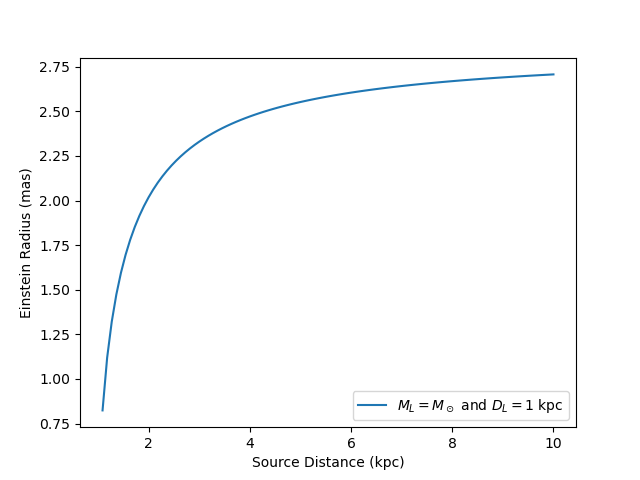

In [37]:
M = 1.0  # M_sun
Dl = 1.0  # kpc
Ds = np.linspace(Dl, 10, 100)  # kpc
Ds = Ds[1:]  # Remove Ds = Dl

theta_E_values = np.array([theta_E(M, Dl, D) for D in Ds])

plt.close(3)  # Close the previous figure, if it exists
plt.figure(3)  # Create a new figure
plt.plot(Ds, theta_E_values, label=r'$M_L=M_\odot$ and $D_L=1$ kpc')
plt.xlabel('Source Distance (kpc)')
plt.ylabel('Einstein Radius (mas)')
plt.legend(loc='lower right')
plt.show()

<style>
.exercise {
    background-color: #E0E0E0;
    border-left: 8px solid #808080;
    padding: 10px 20px;
    margin: 20px 5px;    
}
.exercise h2 {
    color: #808080;
    font-size: 24px;
}
.exercise p {
    margin: 0 20px;  /* Adjust this value to add space after the paragraph */
}
</style>

<div class="exercise">
    <h2>Exercise 3</h2>
    <p>For a fixed mass and source distance, the Eistein radius (<i>r</i><sub>E</sub>) peaks at <i>D</i><sub>L</sub>=<i>D</i><sub>S</sub>/2. Make a plot of <i>r</i><sub>E</sub> vs <i>D</i><sub>L</sub> for a fixed <i>M</i><sub>L</sub> and <i>D</i><sub>S</sub>.</p>
    <br>
</div>


<a id="what-is-it-used-for"></a>
## 2. What is it used for?

<a id="exoplanets"></a>
### 2.1 Exoplanets


<a id="brown-dwarf"></a>
### 2.2 Brown Dwarf


<a id="black-holes-and-other-remnants"></a>
### 2.3 Black Holes and other Remnants


<a id="stellar-population-models"></a>
### 2.4 Stellar Population Models


<a id="dark-matter"></a>
### 2.5 Dark Matter



<a id="microlensing-eras"></a>
## 3. Microlensing Eras


<a id="next-steps"></a>
## Next Steps

Oh hey, you're finished! Well done. 





The next notebook I recommend you try is:

- [Microlensing Geometries - Amber and Scott](microlensingGeometries.ipynb)

But these would also be good choices:
- Higher-Order Effects - Amber and Scott 
- Data Reduction - Michael
- Simulations - Samson
- Modelling - Amber
- The Galactic Model - Macey
- The Nancy Grace Roman Space Telescope - Scott

If none of those tickle you fancy, try picking any one of the other notebooks within the `notebook` directory. 